# Twitter Sentiment Analysis

<div class= "alert alert-block alert-success">
    <b>Sentiment Analysis refers to identifying as well as classifying the sentiments that are expressed in the tweet source.</b> 
    


# Importing Dependencies

In [104]:
#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

#Plotting 
from wordcloud import WordCloud
#General
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
import sklearn
sklearn.__version__

'1.1.2'

In [3]:
df = pd.read_csv("twitter_new.csv", encoding="latin1", header=None)
df.head(3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.columns = ["target", "id", "date", "flag", "user", "text"]

In [6]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
df["target"].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [8]:
df.flag.value_counts()

NO_QUERY    1600000
Name: flag, dtype: int64

In [9]:
def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+", '', str(text))#removes @mentions
    text = re.sub(r"#", "", str(text)) # removes hashtags
    text = re.sub(r"RT[\s]+", "", str(text)) #removes
    text = re.sub(r"https?:\/\/\S+", "", str(text))
    
    return text
    

In [10]:
#CLeaning the text
df["text"] = df["text"].apply(cleanTxt)

In [11]:
df["text"]

0            - Awww, that's a bummer.  You shoulda got Da...
1          is upset that he can't update his Facebook by ...
2           I dived many times for the ball. Managed to s...
3            my whole body feels itchy and like its on fire 
4           no, it's not behaving at all. i'm mad. why am...
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999                             happy charitytuesday    
Name: text, Length: 1600000, dtype: object

In [12]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

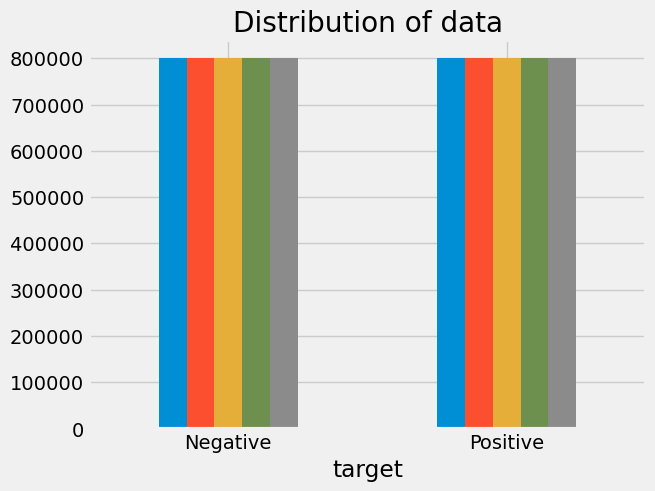

In [13]:
ax = df.groupby("target").count().plot(kind="bar", title="Distribution of data", legend=False)
ax.set_xticklabels(["Negative", "Positive"], rotation=0)


# Data Preprocessing

In [14]:
data = df[["text", "target"]]

In [15]:
data["target"] = data["target"].replace(to_replace=4, value=1)

/var/folders/7t/b1qg16sn1678n9wcn6rzj4sw0000gn/T/ipykernel_25714/2889877824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["target"] = data["target"].replace(to_replace=4, value=1)


In [16]:
data_pos = data[data["target"] == 1]
data_neg = data[data["target"] == 0]

In [17]:
data_pos = data_pos.iloc[:20000]
data_neg = data_neg.iloc[:20000]

In [18]:
dataset = pd.concat([data_pos, data_neg])

In [19]:
dataset["target"]

800000    1
800001    1
800002    1
800003    1
800004    1
         ..
19995     0
19996     0
19997     0
19998     0
19999     0
Name: target, Length: 40000, dtype: int64

In [20]:
dataset["target"].unique()

array([1, 0])

In [21]:
dataset["text"] = dataset["text"].str.lower()

In [22]:
dataset

,text,target
800000,i love u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"thanks for the twitter add, sunisa! i got to ...",1
800003,being sick can be really cheap when it hurts t...,1
800004,he has that effect on everyone,1
...,...,...
19995,"not much time off this weekend, work trip to m...",0
19996,one more day of holidays,0
19997,feeling so down right now .. i hate you damn h...,0
19998,"geez,i hv to read the whole book of personalit...",0


In [23]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
dataset["text"] = dataset["text"].apply(lambda x: clean_stopwords(x))

In [25]:
dataset["text"]

800000                                 love u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    thanks twitter add, sunisa! got meet hin show ...
800003    sick really cheap hurts much eat real food plu...
800004                                      effect everyone
                                ...                        
19995     much time weekend, work trip malmï¿½ fri-sat t...
19996                                      one day holidays
19997                    feeling right .. hate damn humprey
19998     geez,i hv read whole book personality types em...
19999      threw sign donnie bent get thingee made sad face
Name: text, Length: 40000, dtype: object

### Cleaning and removing punctuation


In [26]:
import string

In [27]:
english_punctuation = string.punctuation
def clean_punctuation(text):
    translator = str.maketrans("", "", english_punctuation)
    return text.translate(translator)

dataset["text"] = dataset["text"].apply(clean_punctuation)

In [28]:
data["text"]

0            - Awww, that's a bummer.  You shoulda got Da...
1          is upset that he can't update his Facebook by ...
2           I dived many times for the ball. Managed to s...
3            my whole body feels itchy and like its on fire 
4           no, it's not behaving at all. i'm mad. why am...
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999                             happy charitytuesday    
Name: text, Length: 1600000, dtype: object

In [29]:
def clean_repeating_char(text):
    return re.sub(r"(.)1+", r"1", text)
dataset["text"] = dataset["text"].apply(clean_repeating_char)

In [30]:
data["text"].tail()

1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999                             happy charitytuesday    
Name: text, dtype: object

In [31]:
from nltk.tokenize import word_tokenize
dataset["text"] = dataset["text"].apply(lambda x : word_tokenize(x))

In [32]:
dataset["text"]

800000                             [love, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [thanks, twitter, add, sunisa, got, meet, hin,...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                                   [effect, everyone]
                                ...                        
19995     [much, time, weekend, work, trip, malmï¿½, fri...
19996                                  [one, day, holidays]
19997                 [feeling, right, hate, damn, humprey]
19998     [geezi, hv, read, whole, book, personality, ty...
19999     [threw, sign, donnie, bent, get, thingee, made...
Name: text, Length: 40000, dtype: object

In [33]:
stemmer = nltk.PorterStemmer()
def stemming_on_text(text):
    text = [stemmer.stem(word) for word in text]
    return text
dataset["text"] = dataset["text"].apply(stemming_on_text)

In [34]:
data["text"]

0            - Awww, that's a bummer.  You shoulda got Da...
1          is upset that he can't update his Facebook by ...
2           I dived many times for the ball. Managed to s...
3            my whole body feels itchy and like its on fire 
4           no, it's not behaving at all. i'm mad. why am...
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999                             happy charitytuesday    
Name: text, Length: 1600000, dtype: object

In [35]:
lm = WordNetLemmatizer()
def lemmatizer_on_text(text):
    text = [lm.lemmatize(word) for word in text]
    return text

In [36]:
dataset["text"] = dataset["text"].apply(lemmatizer_on_text)

In [37]:
dataset["text"]

800000                              [love, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [thank, twitter, add, sunisa, got, meet, hin, ...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                                    [effect, everyon]
                                ...                        
19995     [much, time, weekend, work, trip, malmï¿½, fri...
19996                                   [one, day, holiday]
19997                    [feel, right, hate, damn, humprey]
19998     [geezi, hv, read, whole, book, person, type, e...
19999     [threw, sign, donni, bent, get, thinge, made, ...
Name: text, Length: 40000, dtype: object

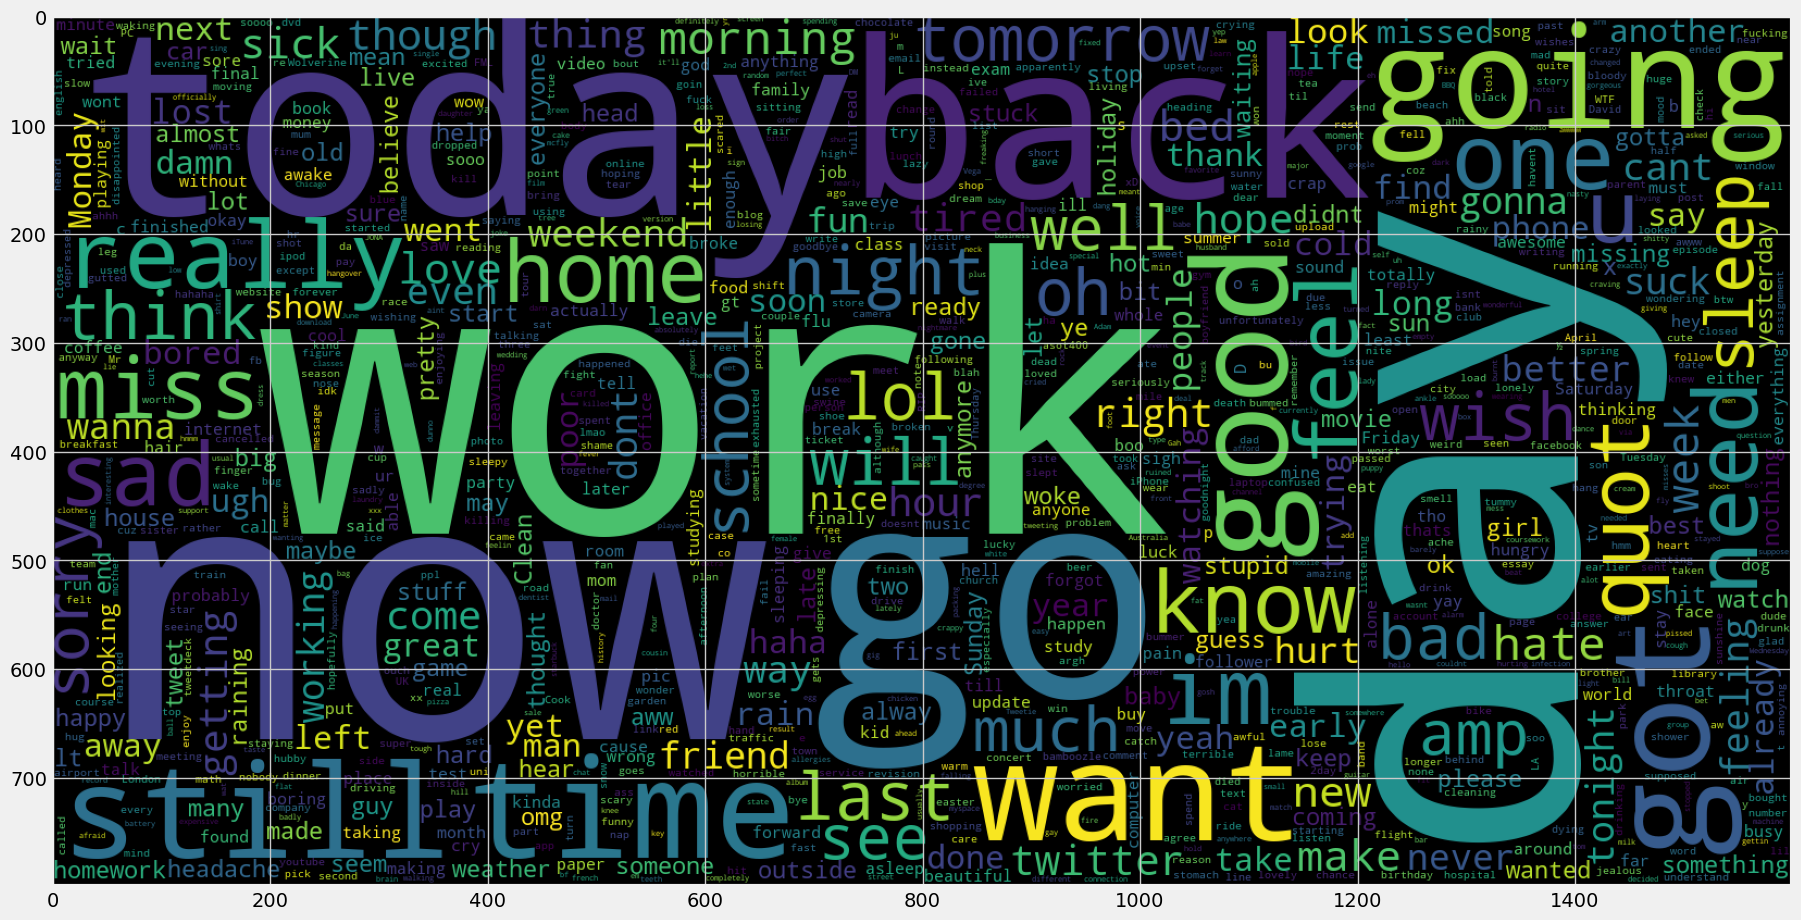

In [38]:
data_neg = data["text"][:80000]
plt.figure(figsize=(20, 20))
w = WordCloud(max_words=1000, width=1600, height=800,
             collocations=False).generate(" ".join(data_neg))
plt.imshow(w)

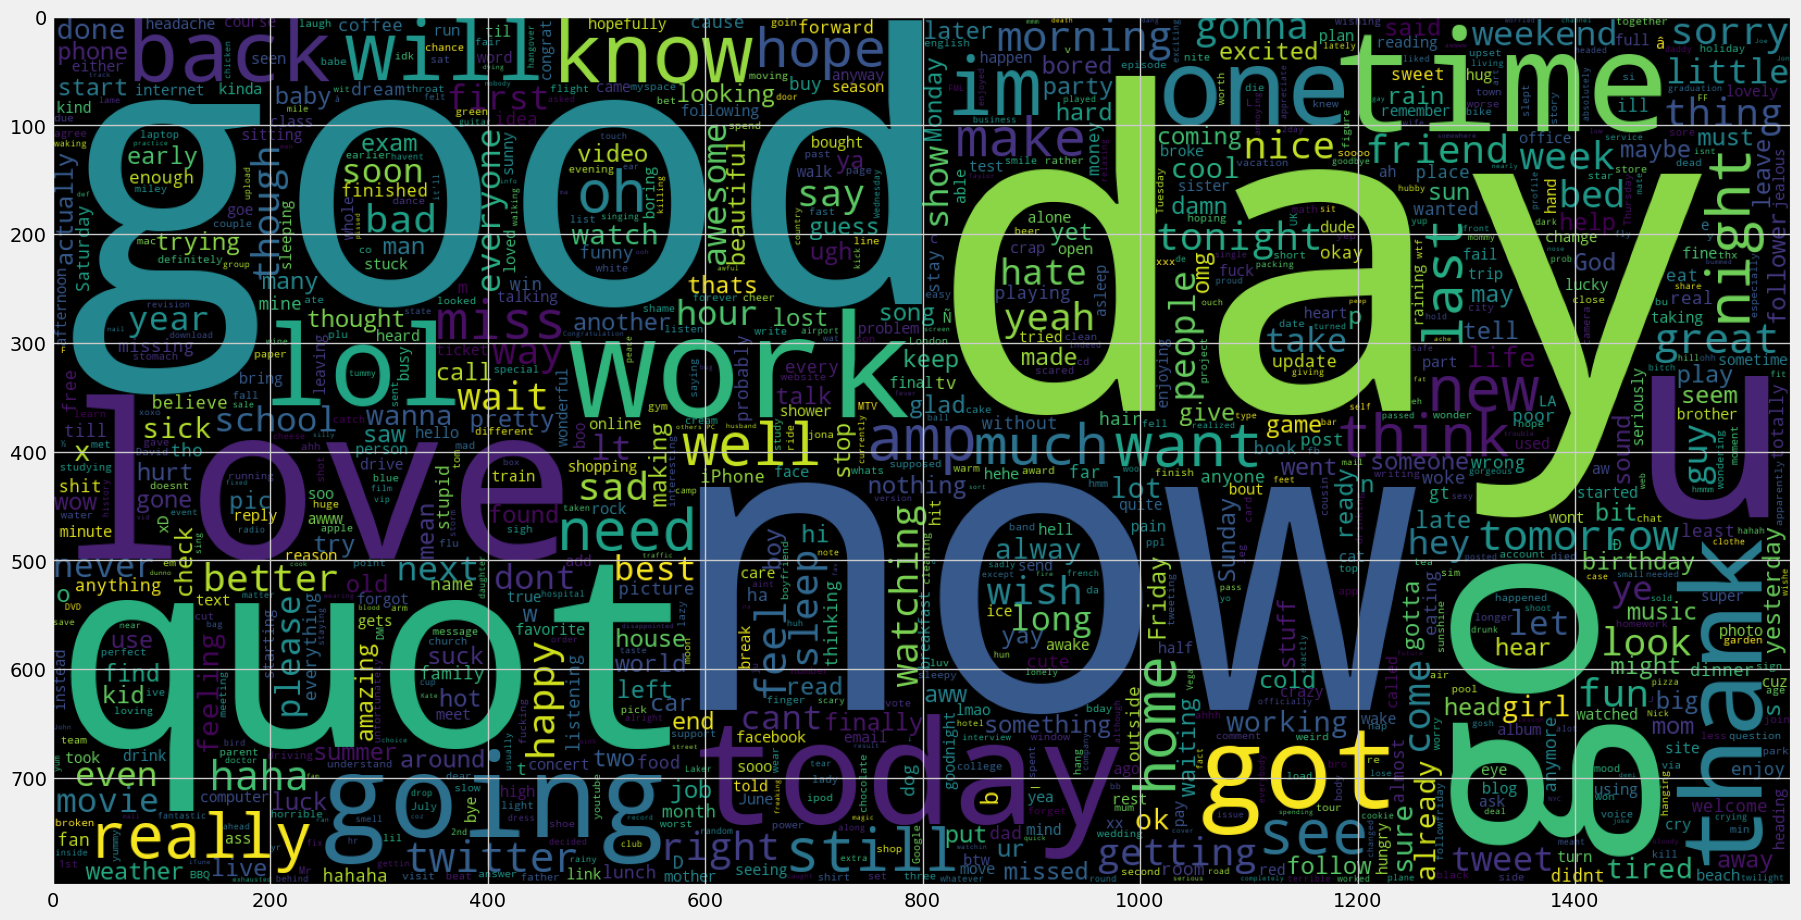

In [39]:
data_pos = data["text"][80000:]
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
              collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

# Splitting the dataset into train and test

In [52]:
X = data.text
y = data.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [54]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(X_train)
print("No of feature words: ", len(vectorizer.get_feature_names()))

No of feature words:  500000


In [55]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

## Function for Model Building

In [96]:
# Function Model Evaluation
def model_evaluate(model):
    #Predict values for test dataset
    y_pred = model.predict(X_test)
    #print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    #compute and plot the confusion matrix
    cf_matrix = plot_confusion_matrix(model, X_test, y_test,cmap="Blues",
                                     normalize="true", display_labels=["Negative", "Positive"])
#     categories = ["Negative", "Positive"]
#     group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
#     group_percentages = ["{0:.2%}".format(value) for value in (cf_matrix.flatten() / np.sum(cf_matrix))]
#     labels = [f"{v1}n{v2}" for v1, v2 in zip(group_names, group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
#     sns.heatmap(cf_matrix, annot=labels, cmap="Blues", xticklabels=categories, yticklabels=categories)
#     plt.xlabel("Predicted Values")
#     plt.ylabel("Actual Values")
#     plt.title("Confusion Matrix")
    

# Model Building

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39999
           1       0.79      0.81      0.80     40001

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


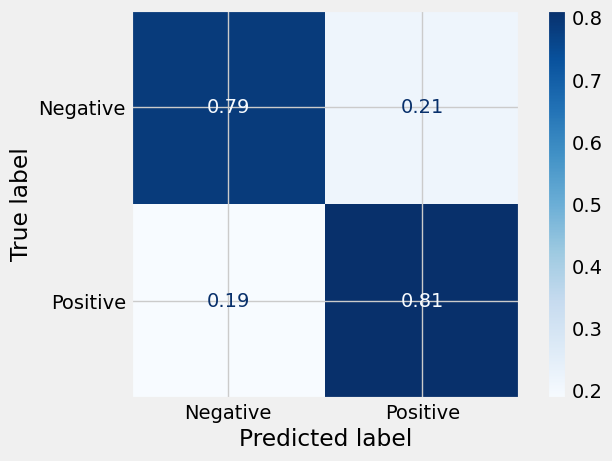

In [97]:
BNB_model = BernoulliNB()
BNB_model.fit(X_train, y_train)
model_evaluate(BNB_model)
y_pred1 = BNB_model.predict(X_test)

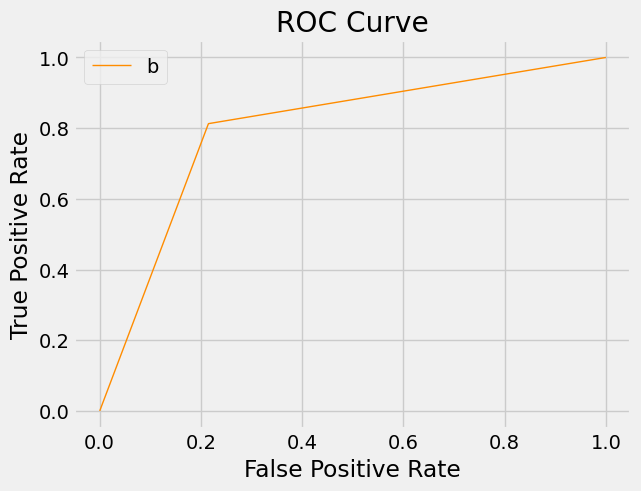

ROC Curve for Bernoulli Naive Bayes is:  0.798974656124359


In [121]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc_1 = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=1, label="ROC Curve (Area = {:.2%})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend("best")
plt.show()
print("ROC Curve for Bernoulli Naive Bayes is: ", roc_auc_1)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     39999
           1       0.81      0.82      0.81     40001

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


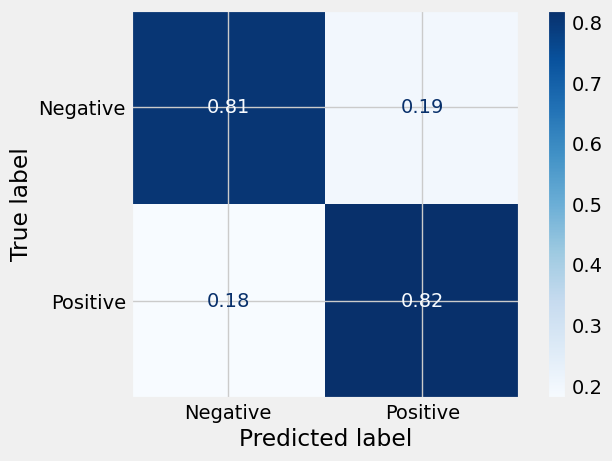

In [107]:
SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)
model_evaluate(SVC_model)
y_pred2 = SVC_model.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


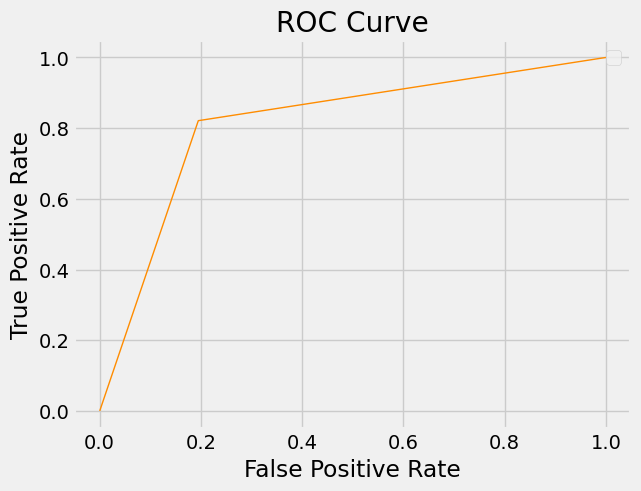

ROC Curve for Supoort Vector Classifier is:  0.8131998017582499


In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc_2 = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()
print("ROC Curve for Supoort Vector Classifier is: ",roc_auc_2)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     39999
           1       0.82      0.83      0.83     40001

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


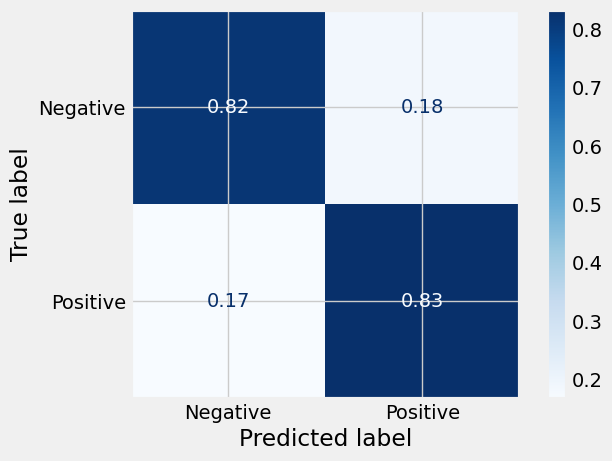

In [113]:
lr = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)
model_evaluate(lr)
y_pred3 = lr.predict(X_test)

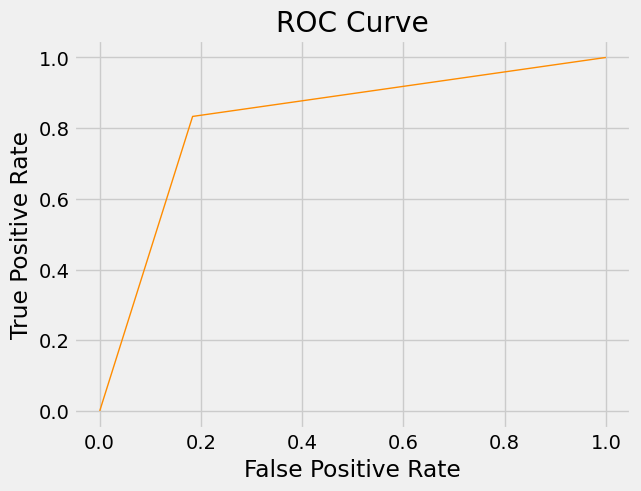

ROC Curve for Logistic Regression is:  0.8248247917655155


In [117]:
fpr, tpr, thresh = roc_curve(y_test, y_pred3)
roc_auc_3 = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("ROC Curve for Logistic Regression is: ", roc_auc_3)

# Conclusion
<div class = "alert alert-block alert-success">
    <b> Upon Evaluating all models, we conclude the following details i.e</b>
    <p> <b> Accuracy </b> Logistic Regression is higher than of Support Vector Machine, whose is better than Bernoulli Naive Bayes</p>
    <p> <b> F1-Score </b> For class 0: Bernoulli Naive Bayes (0.80) < SVM (0.81) < Logistic Regression (0.82) </p>
    <p><b> F!-Score</b> For class 1: Bernoulli Naive Bayes(0.80) < SVM (0.81) < Logistic Regression (0.83) </p>
    <p> <b> AUC Score </b> Logistic Regression > SVM > Bernoulli Naive Bayes </p>
    
<b> We therefore conclude that Logistic Regression is the best model for the above dataset</b>